In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import librosa

[-0.13281433 -0.19079727 -0.19583562 ... -0.02706646 -0.02093386
 -0.01280731]
441000


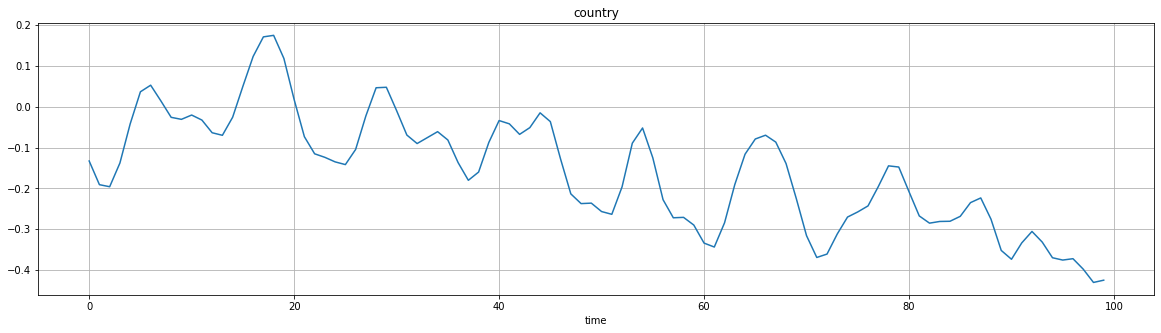

In [4]:
#loading the audio file into timeseriesarray x and samplingrate sr using defalut sr of 22100
audio_data="./data/country/country.00000_1.wav"
x, sr = librosa.load(audio_data, 44100)
print(x)
print(len(x))
plt.figure(figsize=(20, 5))
plt.plot(x[0:100])
plt.title("country")
plt.xlabel("time")
plt.grid()

Average ZCR: 0.04424488743679994
Standard ZCR: 0.009460574324555056


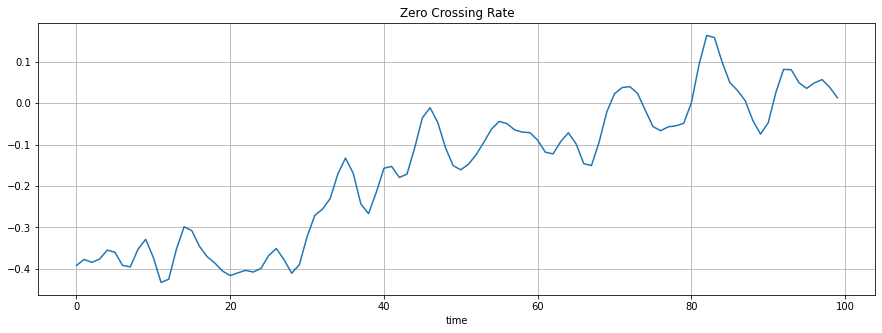

In [5]:
#extracting the zerocrossingrate feature
zcr=librosa.feature.zero_crossing_rate(x,sr)
#print(zcr)
avgzcr = np.mean(zcr)
stdzcr = np.std(zcr)
print("Average ZCR:",avgzcr)
print("Standard ZCR:",stdzcr)
plt.figure(figsize=(15, 5))
plt.plot(x[100:200])
plt.title("Zero Crossing Rate")
plt.xlabel("time")
plt.grid()

Average RMSE: 0.2580549
Standard RMSE: 0.024906179


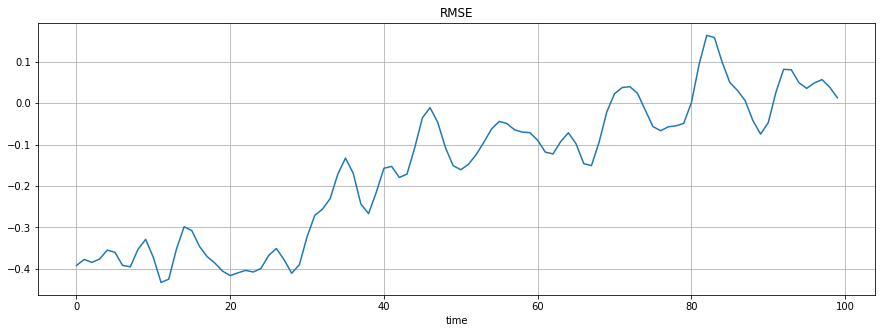

In [6]:
#extracting the rmse feature
rmse=librosa.feature.rms(x,sr)[0]
#print(rmse)
rmse_mean = np.mean(rmse)
rmse_var = np.std(rmse)
print("Average RMSE:",rmse_mean)
print("Standard RMSE:",rmse_var)
plt.figure(figsize=(15, 5))
plt.plot(x[100:200])
plt.title("RMSE")
plt.xlabel("time")
plt.grid()

Spectral Centroid: 2526.758520133803


Text(0.5, 0, 'time')

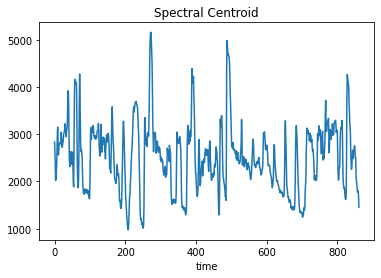

In [7]:
#spectral centroids
spcts = librosa.feature.spectral_centroid(x,sr)[0]
mean_spcts = np.mean(spcts)
#print(spcts)
print("Spectral Centroid:",mean_spcts)
plt.plot(spcts)
plt.title("Spectral Centroid")
plt.xlabel("time")

Mean Spectral Roll off: 5900.971974242314
Standard Spectral Roll off: 1639.3768765444172


Text(0.5, 0, 'time')

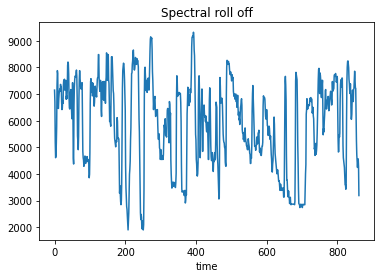

In [8]:
#spectral roll off
sprf = librosa.feature.spectral_rolloff(x,sr)[0]
mean_sprf = np.mean(sprf)
std_sprf = np.std(sprf)
#print(sprf)
print("Mean Spectral Roll off:",mean_sprf)
print("Standard Spectral Roll off:",std_sprf)
plt.plot(sprf)
plt.title("Spectral roll off")
plt.xlabel("time")

20
862


Text(0.5, 0, 'time')

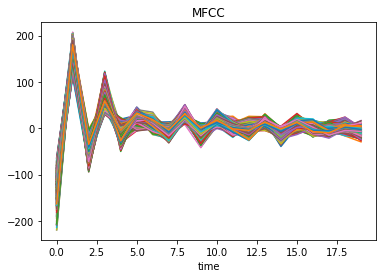

In [9]:
#Mel-Frequency Cepstral Coefficients
mfcc = librosa.feature.mfcc(x,sr)
#print(mfcc)
print(len(mfcc))
print(len(mfcc[0]))
plt.plot(mfcc)
plt.title("MFCC")
plt.xlabel("MFCC coeffecient")

(862,)


Text(0.5, 0, 'time')

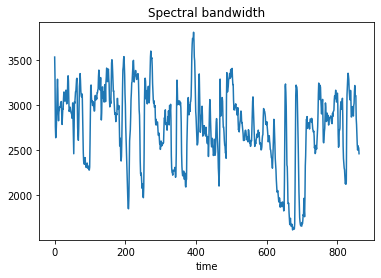

In [10]:
#spectral bandwidth
spbw = librosa.feature.spectral_bandwidth(x,sr)[0]
#print(spbw)
print(spbw.shape)
plt.plot(spbw)
plt.title("Spectral bandwidth")
plt.xlabel("time")

(12, 862)
0.5272694


Text(0.5, 0, 'time')

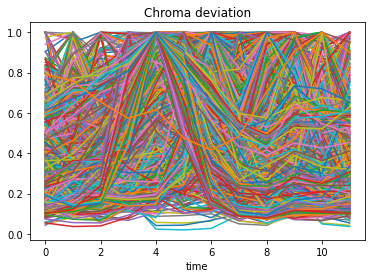

In [11]:
#Chroma deviation
chstft = librosa.feature.chroma_stft(x,sr)
print(chstft.shape)
print(np.mean(chstft))
plt.plot(chstft)
plt.title("Chroma deviation")
plt.xlabel("Chroma coefficients")

In [18]:
#populating headers
headers = 'filename zcr_mean zcr_var rmse_mean rmse_var spectral_centroid mean_spectral_rolloff var_spectral_rolloff spectral_bandwidth '
for index in range(1, 13):
    headers += f' chroma{index}'
for index in range(1, 21):
    headers += f' mfcc{index}_mean mfcc{index}_var'
headers += ' genre'
headers = headers.split()
print(headers)
print(len(headers))

['filename', 'zcr_mean', 'zcr_var', 'rmse_mean', 'rmse_var', 'spectral_centroid', 'mean_spectral_rolloff', 'var_spectral_rolloff', 'spectral_bandwidth', 'chroma1', 'chroma2', 'chroma3', 'chroma4', 'chroma5', 'chroma6', 'chroma7', 'chroma8', 'chroma9', 'chroma10', 'chroma11', 'chroma12', 'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean', 'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var', 'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean', 'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var', 'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean', 'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var', 'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean', 'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var', 'genre']
62


In [21]:
#storing headers into csv
import csv
file = open('mycsv_35+chroma_new5genre(1).csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(headers)

In [22]:
#storing values into csv
import os
music_genres = 'blues pop country hiphop jazz'.split()
for genre in music_genres:
    for music_file in os.listdir(f'./data/{genre}'):
        audio_data = f'./data/{genre}/{music_file}'
        x, sr = librosa.load(audio_data, mono=True)
        zcr=librosa.feature.zero_crossing_rate(x,sr)
        rmse=librosa.feature.rms(x,sr)[0]
        spcts = librosa.feature.spectral_centroid(x,sr)[0]
        sprf = librosa.feature.spectral_rolloff(x,sr)[0]
        mfcc = librosa.feature.mfcc(y=x, sr=sr)  
        spbw = librosa.feature.spectral_bandwidth(x,sr)[0]
        chstft = librosa.feature.chroma_stft(x,sr)
        feature_data = f'{music_file} {np.mean(zcr)} {np.std(zcr)} {np.mean(rmse)} {np.std(rmse)} {np.mean(spcts)} {np.mean(sprf)} {np.std(sprf)} {np.mean(spbw)}'
        for c in chstft:
            feature_data += f' {np.mean(c)}'
        for m in mfcc:
            feature_data += f' {np.mean(m)} {np.std(m)}'
        feature_data += f' {genre}'
        file = open('mycsv_35+chroma_new5genre(1).csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(feature_data.split())